In [75]:
import pandas as pd
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline
import matplotlib.pyplot as plt

**1:** Read ```yelp.csv``` into a DataFrame

In [76]:
yelp = pd.read_csv('../DAT-DC-10/data/yelp.csv')

**2:** Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [77]:
yelp2 = yelp[(yelp.stars==5) | (yelp.stars==1)]

**3:** Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [78]:
X = yelp2['text']
y = yelp2['stars']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

**4:** Use CountVectorizer to create document-term matrices from X_train and X_test.

In [79]:
# initialize CountVectorizer
vect = CountVectorizer()

# use the training data to fit the vectorizer
vect.fit(X_train)

# use the vectorizer to create DTM for the training and test data
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

**5:** Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [80]:
# initialize Naive Bayes
nb = MultinomialNB()

# fit using training data
nb.fit(X_train_dtm, y_train)

# predict on test data
y_predict = nb.predict(X_test_dtm)

# calculate prediction accuracy score
metrics.accuracy_score(y_test, y_predict)

0.90998043052837574

**6:** Calculate the AUC.

In [81]:
# Thanks for Hint #1
# predict probabilities
y_predict_prob = nb.predict_proba(X_test_dtm)[:, 1]

# Thanks for Hint #2
# Convert prediction stars 1 and 5 to class 0 and 1
y_test2 = y_test.copy(deep=True)
y_test2.replace(to_replace=1, value=0,inplace = True)
y_test2.replace(to_replace=5, value=1,inplace = True)

# calculate the roc_auc_score using the binary prediction and the prediction probability
metrics.roc_auc_score(y_test2, y_predict_prob)

0.93878865979381443

**7:** Plot the ROC curve.

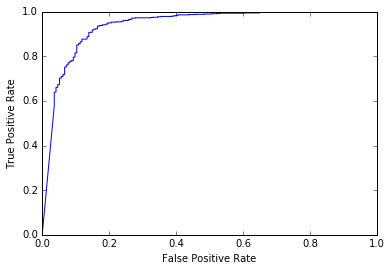

In [82]:
# calculate ROC curve using using the binary prediction and the prediction probability
fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_predict_prob)

# plot the false positive rate against the true positive rate
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**8:** Print the confusion matrix, and calculate the sensitivity and specificity. Comment on the results.

In [95]:
print "Confusion Matrix:\n"
cm = metrics.confusion_matrix(y_test, y_predict)
print cm
print  "\n"
print "Sensitivity = " + str(float(cm[1][1]) / float(cm[1][0] + cm[1][1]))
print "Specificty = " +  str(float(cm[0][0]) / float(cm[0][0] + cm[0][1]))

Confusion Matrix:

[[118  76]
 [ 16 812]]


Sensitivity = 0.980676328502
Specificty = 0.60824742268


Conclusion: Model is performing better at detecting the positive reviews compared to the negative reviews.

**9:** Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [97]:
# false positives: predictions are positive (5-star) but actuals are negative (1-star)
X_test[y_test < y_predict][10:20]

1297    I dined at this restaurant on a Saturday morni...
1116    Bad quality ingredients. I ordered a red curry...
9833    My significant other had a $25 off coupon from...
1243    Einsteins in general has mediocre bagels at be...
9984    Went last night to Whore Foods to get basics t...
5237    My love affair with Fate ended when Johnny lef...
3628    I have been to a buffet like this before, but ...
8829    The parking is my beef with this place.  Why d...
9183    The food is simple, pure and uncomplicated; yo...
9026    Quick spot for a mall-made mayo-based Californ...
Name: text, dtype: object

In [98]:
# false negatives: predictions are negative (1-star) but actuals are positive (5-star)
X_test[y_test > y_predict][10:20]

750     This store has the most pleasant employees of ...
5805    One of our Lexus car keys/key fob was cracked ...
2306    There are certain people in your life that you...
921     Just because i feel like doing something diffe...
2127    This place is great!  I called at 8:30 am to m...
8571    If it's an emergency, they will generally see ...
Name: text, dtype: object

Conclusion: Probably getting confused because of positive words in negative reviews and negative words in positive reviews. (Not enough time to look into the text in detail.)

**10.** Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?

In [ ]:
# have to try the different thresholds and 
# find the threshold where sensitivity and 
# specificity are roughly equal.

# TODO

**11.** Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:

- Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)

In [100]:
X = yelp["text"]
y = yelp["stars"]

- Split the data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

- Calculate the testing accuracy of a Naive Bayes model.

# ------ out of time ------